<a href="https://colab.research.google.com/github/junehyung1112/hello-world/blob/master/11%EA%B0%95_%EC%BB%A8%EB%B3%BC%EB%A3%A8%EC%85%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#컨볼루션 신경망을 통해서 2차원 도형을 인식할 수 있고  학습 결과를 분석할 수 있음
#컨볼루션 신경망(cnn) : 이미지로부터 직접 공간적 특징을 학습.
#기하학적 변형에도 강함.
#학습한 필터를 사용해 특징이 추출되면 기존 신경망을 사용해 분류.
#cnn도 역전파 오류 알고리즘을 사용해 학습을 수행.
#입력이미지 -> 컨볼루션 계층(필터링 수행) -> 풀링 계층(이미지 크기 줄임) -> 다층 신경망 계층(이미지를 분류)
#컨볼루션 및 풀링 계층을 반복적으로 사용해 다층 구성, 신경망도 다수의 은닉층을 포함한 다층 구조.
#컨볼루션 계층과 풀링 계층을 다층으로 구성할 경우 각 계층을 통과할 때마다 다양한 의미를 갖는 필터 학습
#입력과 가까운 계층에서는 대체로 저차원의 필터를 학습.
#예를 들어: 얼굴 데이터가 주어졌을 때, 저차원 필터는 전체적으로 밝고 어두운 부분, 특정 방향 구분 을 수행
#그 다음 계층에서는 저차원 필터를 조합해 중간 레벨 필터를 학습->눈,코,입과 같은 영역을 학습 가능.
#다음 계층에서는 중간 레벨 필터를 통해 고차원 필터가 만들어짐. -> 얼굴 인식이 가능

#컨볼루션 계층:
#32*32크기의 이미지가 주어짐. -> 5*5필터 6개로 컨볼루션 연산 수행 -> sigmoid 함수를 통해 최종 특징맵이 만들어짐
#이때 특정맵의 크기는 32*32*6
#컨볼루션 연산을 하는 과정에서 가장자리 픽셀들은 이웃하는 픽셀 정보가 없어서 연산 수행 불가능
#그래서 5*5입력이미지에 3*3필터를 거치면 3*3출력 영상이 나옴. : 입력 이미지의 크기가 줄어듬
#컨볼루션 계층을 여러번 거쳐도 영상의 크기를 유지할 수 있도록 입력 영상의 가장자리에 0으로 padding을 수행
#padding=데이터의 외부에 일정한 값의 계층을 덧대는 것.(zero padding을 주로 사용)
#출력 영상 크기 = (2p+n) * (2p+n) p=padding 값, n= 입력 영상의 크기
#stride = 컨볼루션 연산 시 이동하는 x방향과 y방향의 이동량(보폭)
#보통 stride값은 1, 한 픽셀씩 이동하면서 연산을 수행.
#stride값이 커지면 데이터의 크기가 줄어들 수 있어서 보통 1을 사용.

#풀링 계층:
#입력 영상의 크기를 줄이는 역할
#영상의 크기를 반감해 계산량을 줄이고, 데이터에 치중된 과적합을 방지.
#컨볼루션 신경망에서는 많은 데이터를 사용해서 데이터의 크기가 매우 커질 수 있음.
#이것이 과적합을 일으킬 수가 있음.
#풀링 계층은 영상의 크기를 줄이는 과정에서 대략적인 정보 특성만 남게 됨.
#컨볼루션 계층으로 영상이 출력되면
#각각의 영상에 대해서 풀링 연산을 통해 반으로 줄어든 영상이 출력.
#만약 4*4영상이 있을 경우 이를 풀링해서 2*2로 만들기 위해서 구간을 정하고 거기서 값을 선택해야 함.
#만약 왼쪽 상단의 값을 사용하면 left-top pooling
#max pooling은 그 구간에서 가장 큰 값을 선택한 것
#average pooling은 그 구간의 평균값을 선택.
#주로 max pooling을 사용.

#컨볼루션 계층과 max pooling 계층으로 묶여진 과정은 반복될 수 있음.

#다층 신경망 계층:
#이전 계층의 2차원 형태의 데이터를 flatten을 사용해 1차원 벡터로 변환한 뒤 기존 신경망에 전달.
#복잡한 분포를 갖는 문제 해결을 위해 마지막 계층을 다층 신경망으로 구성.
#컨볼루션 계층과 맥스 풀링 계층은 특징을 추출하는 역할.
#신경망 계층은 특징을 분류하는 역할.

#cnn 응용분야
#1. 영상 인식 분야. 

In [0]:
#알아볼 것
#1. 도형 이미지의 데이터셋 구성
#2. 학습 데이터와 테스트 데이터 분할.
#3. cnn을 이용한 도형 인식
#4. 다층 구조로 확장하기
#5. 학습결과 분석 및 시각화.

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

sess = tf.Session()


In [0]:
from google.colab import drive #구글 드라이브에서 정보를 가져오기 위해서 코랩과 구글 드라이브를 연동.
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#네모 세모 원 3개의 클래스를 가진 도형 이미지를 컨볼루션 신경망으로 학습.
x_data = [] #도형 이미지를 저장
y_data = [] #도형 이미지 레이블 데이터를 저장.

im = 10

for i in range(40) : #40개의 이미지를 1차원으로 변환한뒤 x_data에 추가.
    img = Image.open(('/content/drive/My Drive/file2/shapedata/네모%d.png') % (i+1))
    gray = img.convert('L').resize((im, im))     #흑백으로 변환한뒤 10*10으로 변환
    data = np.array( gray, dtype='uint8' )    #이미지 데이터를 numpy객체로 변환
    x_data.append(  data.flatten()   ) #flatten으로 2차원 데이터를 1차원으로 변환. 40개의 네모 이미지가 추가. 40*100
    y_data.append(0) #네모 이미지의 레이블은 0 4 ydata 크기 = 40
    
for i in range(40) :
    img = Image.open(('/content/drive/My Drive/file2/shapedata/세모%d.png') % (i+1))
    gray = img.convert('L').resize((im, im))    
    data = np.array( gray, dtype='uint8' )    
    x_data.append(  data.flatten()   )
    y_data.append(1)
    
for i in range(40) :
    img = Image.open(('/content/drive/My Drive/file2/shapedata/원%d.png') % (i+1))
    gray = img.convert('L').resize((im, im))    
    data = np.array( gray, dtype='uint8' )    
    x_data.append(  data.flatten()   )
    y_data.append(2)
    
x_data = np.array(x_data) / 255.0 #x_data리스트를 넘파이 객체로 변환하고 255로 나누어 밝기 값을 0->1
y_data = np.array(y_data) #y_data 리스트도 numpy 객체로 변환.
print(x_data.shape)
print(y_data.shape)
#현재 y_data에는 네모이미지는 0, 세모이미지는 1, 원이미지는 2의 레이블 값으로 저장되어있음.

(120, 100)
(120,)


In [0]:
#신경망에서는 다중 클래스를 분류하기 위해서 레이블 벡터는 one-hot encoding으로 표현된
#2차원 행렬로 표현,
#one hot encoding을 하면 0 -> 100 1 -> 010, 2 ->001과 같이
#클래스의 개수가 열의 개수가 됨.
def one_hot(y, nclass) :
    r = y.shape[0]
    mat = np.zeros([r, nclass])
    for i in range(r) :
        mat[i, int(y[i])] = 1        
    return mat

y_data_onehot = one_hot(y_data, 3)
print(y_data.shape)
print(y_data[0:5])
print(y_data_onehot.shape)
print(y_data_onehot[0:5, :])


(120,)
[0 0 0 0 0]
(120, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


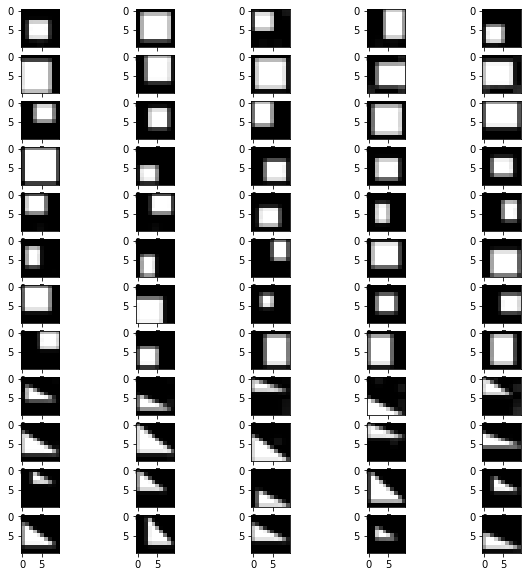

In [0]:
#1차원으로 저장된 x_data가 제대로 저장됐는지 확인하기 위해 다시 2차원으로 변환.
plt.figure(figsize=(10,10))
for i  in range(60) : #60개의 이미지만 출력.
    plt.subplot(12, 5, i+1)
    plt.imshow(x_data[i,:].reshape(im,im), cmap='gray')#x data에서 1차원 데이터를 가져와 2차원으로 변환해 출력.
    #데이터는 0~1로 정규화가 되어있지만 imshow 함수가 이를 0~255로 스케일링 해서 출력함.
    #그래서 이미지를 복구할 떄 다시 255를 곱할 필요는 없음.

In [0]:
#도형 이미지 데이터 셋을 학습 데이터와 테스트 데이터로 분할.
def split(x_data, y_data, rate) : #(이미지데이터 x_data와 이미지 레이블 데이터 y_data, 학습데이터의 비율 )
    #학습데이터와 레이블 데이터를 각각 학습과 테스트 데이터로 분할해주는 역할을 수행.
    n = x_data.shape[0] #x_data의 행의 개수 즉 이미지 데이터의 개수는 n에 저장.
    arr = np.arange(n)   #arrange함수는 인자 n이 주어지면 0~n-1 값으로 이루어진 벡터를 리턴.
    np.random.shuffle(arr) #arr 벡터의 값들을 랜덤으로 섞어줌-> 전체 데이터를 랜덤하게 섞음.

    n0 = int(n * rate) # 이미지 데이터의 개수 n과 트레인 데이터의 비율을 곱해 저장.
    #만약 전체 데이터의 개수 =120 r = 0.8 -> 96개 학습용 나머지 test용.
    #학습 데이터의 개수여서 정수로 변환함.


    #arr 벡터와 no를 사용해 학습과 테스트용 데이타로 분할
    #예를 들어 n0가 96이면 arr에서 0~95까지가 값을 가져옴. arr행렬의 값들을 x벡터의 행의 인덱스로 사용
    #x_data에서 랜덤으로 96개를 선택한 후 저장. 나머지는 테스트용.
    x_train = x_data[arr[0:n0], :]  
    y_train = y_data[arr[0:n0], :]
    x_test =  x_data[arr[n0:], :]
    y_test =  y_data[arr[n0::], :]
    
    return (x_train, y_train, x_test, y_test)

#split을 사용해 x_data와 y_data를 80% 비율로 학습 세트와 테스트 세트로 분할.
x_train, y_train, x_test, y_test = split(x_data, y_data_onehot, 0.8) #80 : 20의 비율

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(96, 100) (96, 3)
(24, 100) (24, 3)


In [0]:
#학습 데이터를 이용해 컨볼루션 신경망을 학습한 후, 테스트 데이터로 정확도 측정.
#컨볼루션 계층, 풀링 계층, 은닉층 한개, 출력층 한개로 구성.
#클래스는 이미지가 네모, 세모, 원으로 구성 -> class =3
#이미지의 크기 = 10 * 10 , 필터는 32개를 사용.
#은닉층의 노드 수 = 300

nclass = 3
dim = im * im
nfilter = 32
nhidden = 300

x = tf.placeholder("float", shape=[None, dim]) #x행은 이미지 데이터의 개수 none, 열은 이미지 데이터의 크기 100
y = tf.placeholder("float", shape=[None, nclass]) #실제 레이블 데이터 저장. y행은 이미지 데이터의 개수 none, 열은 클래스의 개수 3
#one-hot encoding된 레이블 행렬이 placeholder에 제공됨.

#2차원 컨볼루션 연산을 위해 x를 4차원 텐서로 reshape
x_image = tf.reshape(x, [-1,im,im,1]) #이미지의 개수(몇개인지 몰라서 -1), 이미지의 높이, 이미지의 폭, 입력 채널 수
#실제 이미지 데이터를 넣어주면 이미지 데이터의 개수로 x가 바뀜, 이미지가 grey 영상이라 입력채널은 1개.

In [0]:
#컨볼루션 계층 정의하기 
#filter를 학습해야 하므로 random하게 초기화함. -> 학습을 통해 최적의 필터 가정치를 계산.
#random_normal 함수를 사용해 정규확률 분포값으로 부터 랜덤하게 생성
#필터의 4차원 배열 크기는 (필터크기, 필터크기, 입력층의 ()수, 필터 개수)
filter = tf.Variable(tf.random_normal([3, 3, 1, nfilter], stddev=0.1)) #input과 컨볼루션 사이의 weight인 filter
b = tf.Variable(tf.constant(0.1, shape=[nfilter])) #각각의 필터마다 더해주는 바이어스 변수

#conv2d로 conv연산을 하고 여기에 bias를 더해서 sigmoid 함수를 호출.
conv = tf.nn.sigmoid(tf.nn.conv2d(x_image, filter, strides=[1, 1, 1, 1], padding='SAME') + b)
print(conv.shape)

#출력된 4차원 배열의 크기 (?=이미지 데이터의 개수)

(?, 10, 10, 32)


In [0]:
#풀링 계층 정의.
#가장 큰 값을 출력하는 max pooling을 이용.
#(위에서 계산한 conv 결과, kernel size(4개의 픽셀을 하나의 픽셀로 만들려고 2,2, 첫번째와 네번째가 1인 것은
#모든 데이터와 모든 채널에 대해서 계산해야하기 때문), stride는 x축과 y축을 2칸씩 이동.첫번째와 네번째가 1인 것은
#모든 데이터와 모든 채널에 대해서 계산해야하기 때문 ), padding은 사용(same)


#이렇게 할 경우 poolig 계층을 지나면 원본 데이터가 반으로 줄어듬
pool = tf.nn.max_pool(conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
print(pool.shape)

(?, 5, 5, 32)


In [0]:
#다층 신경망 계층을 정의, 입력 데이터를 1차원 벡터로 변환.

#입력데이터 pool을 2차원에서 1차원으로 변환.
#1차원 벡터의 크기는 이미지의 가로/2 * 이미지의 세로/2 * 필터 개수(맥스 풀링을 한번 지나서 2로 나눔)
h_flat = tf.reshape(pool, [-1, int(im/2) * int(im/2) * nfilter]) # 크기는 800

#풀링 계층과 다층 신경망 계층 사이의 웨이트와 바이어스를 정의
w_fc = tf.Variable(tf.random_normal([int(im/2) * int(im/2) * nfilter, nhidden], stddev=0.1))   #1250
#바이어스는 0.1 값으로 초기화함. 바이어스는 은닉층에 부과되기 때문에 은닉층의 노드 수 크기의 일차원 벡터가 됨.
b_fc = tf.Variable(tf.constant(0.1, shape=[nhidden]))

#은닉층의 출력을 계산
h_fc = tf.sigmoid(tf.matmul(h_flat, w_fc) + b_fc)

print(pool.shape) 
print(h_flat.shape)
print(w_fc.shape)
print(h_fc.shape)

(?, 5, 5, 32)
(?, 800)
(800, 300)
(?, 300)


In [0]:
#은닉층과 출력층 사이의 weight와 bias 정의.
w_out = tf.Variable(tf.random_normal([nhidden, nclass], stddev=0.1))
#w_out 행렬의 크기는 이전 은닉층의 노드수 (300), 출력층의 노드 수(클래스 수) = 3이 됨.
b_out = tf.Variable(tf.constant(0.1, shape=[nclass]))
#출력층의 노드수로 이루어진 일차원 벡터.

#출력층의 출력을 계산.
logits = tf.matmul(h_fc, w_out) + b_out 

print(w_out.shape)#출력층의 가중치 행렬 w_out의 크기
print(logits.shape)#출력층의 출력 행렬 logit의 크기

(300, 3)
(?, 3)


In [0]:
#신경망의 출력을 softmax를 사용해 확률값을 계산하고 학습 데이터에 대한 추정값을 계산.
hypothesis = tf.nn.softmax(logits)

#cost는 멀티 클래스여서 cross-entropy를 사용
cost = -tf.reduce_mean(y*tf.log(hypothesis))
#경사하강법 사용
update = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

    
#예측값은 armax로 계산. 주어진 입력에서 최댓값을 가진 값의 인덱스를 계산.
# argmax    :  [ 0.2   0.1   0.7    ]   -> 2
predicted = tf.argmax(hypothesis, 1) #1 = 행을 기준 0 = 열을 기준
#hypothesis의 크기가 데이터의 개수 * 클래스 수이기 때문에 행을 기준으로 최댓값을 구하면
#각각의 데이터에 대한 예측값을 계산할 수 있음.

#predict 
#  equal  [  1 1  1 1   ] ==  [ 0 0 1 1 ]   ->  [ false false true rue]
#  cast [ false false true true ]  ->  [ 0 0 1 1 ]
# reduce_mean[ 0 0 1 1] -> 2/4 = 0.5 ->모든 원소의 값을 더해서 원소의 개수로 나누는 함수.
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, tf.argmax(y, 1)), tf.float32))

In [0]:
#추정해야하는 가중치들. 
print(filter.shape) #3*3크기의 filter 32개에 대한 가중치 = 288개
print(b.shape) #필터에 대한 바이어스 32개
print(w_fc.shape) #은닉층의 가중치 24만개
print(b_fc.shape) #은닉층의 바이어스 300개
print(w_out.shape) #출력층의 가중치 900개
print(b_out.shape) #출력층의 바이어스 3개
#학습해야하는 가중치에 비해 학습 데이터가 너무 작아 학습이 제대로 안될 수도 있음.

(3, 3, 1, 32)
(32,)
(800, 300)
(300,)
(300, 3)
(3,)


In [0]:
#학습 시작.
sess.run(tf.global_variables_initializer())

#학습횟수= 6000번
#학습 시에는 x_train과 y_train 테스트 시에는 x_test와 y_test를 이용.
for i in range(6001) :    
    sess.run(update,feed_dict={x: x_train, y: y_train})
    
    if i % 300 == 0 :
        a, c = sess.run([accuracy, cost], feed_dict={ x:x_test, y: y_test})
        print(i, "test : ",  a, c)    
a = sess.run(accuracy, feed_dict={ x:x_train, y: y_train})     
print(a)
#학습 데이터에 대한 정확도는 0.989이지만 테스트 데이터에 대한 정확도는 대략 70~85%로 나옴.

0 test :  0.25 0.40764868
300 test :  0.5833333 0.35175407
600 test :  0.7916667 0.30058533
900 test :  0.7916667 0.2488096
1200 test :  0.8333333 0.21828005
1500 test :  0.7916667 0.19890158
1800 test :  0.7916667 0.18528083
2100 test :  0.7916667 0.17438622
2400 test :  0.8333333 0.16529004
2700 test :  0.8333333 0.15769473
3000 test :  0.7916667 0.1490518
3300 test :  0.8333333 0.1423393
3600 test :  0.8333333 0.1381144
3900 test :  0.8333333 0.13448614
4200 test :  0.8333333 0.13138354
4500 test :  0.8333333 0.12888286
4800 test :  0.8333333 0.12704861
5100 test :  0.8333333 0.126039
5400 test :  0.8333333 0.12619784
5700 test :  0.8333333 0.12779856
6000 test :  0.8333333 0.1287126
0.9583333


In [0]:
#컨볼루션, 신경망, output 계층 함수로 만들어 일반화

#1. 컨볼루션 계층을 생성하는 함수 정의.

def convolutionLayer(input, nfilter, sfilter) : #입력데이터(4차원 텐서), 필터의 개수, 필터의 크기
    
    size = input.shape.as_list()  #입력데이터의 shape 정보는 as_list함수를 사용해 list함수로 변환해 size에 저장.
    nhidden = size[3]       #size의 3번째 인덱스의 열을 가져와 nhidden에 저장. 
    #nhidden은 입력 데이터가 영상(초기 데이터)일 때, 입력 이미지 데이터의 채널 수
    #입력 데이터가 컨볼루션이 계산된 특징맵일(초기 데이터x) 경우, 이전층의 필터수 즉 이전층의 출력채널 수가 됨.
    
    #필터(초기화, 크기, 이전 층 필터개수, 출력할 필터 개수)
    filter = tf.Variable(tf.random_normal([sfilter, sfilter, nhidden, nfilter], stddev=0.1))
    b = tf.Variable(tf.constant(0.1, shape=[nfilter])) #출력할 필터 수 크기의 벡터.
    conv = tf.nn.sigmoid(tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME') + b)
    pool = tf.nn.max_pool(conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')    
    return pool #풀링 층을 거친 결과를 return

In [0]:

def neuralnetworkLayer(pool, nhidden) : #(입력 데이터(4차원 텐서), 은닉층의 노드수)
    
    #2차원 필터로 이루어진 데이터를 1차원 데이터로 변경
    #이전에는 영상 크기와 필터 크기를 직접 계산했지만, 여기서는 임의의 크기 영상이 사용될 수 있고
    #convoluton이 여러번 사용될 수 있기 때문에, 입력 데이터로 부터 일차원으로 만들 크기를 계산.
    #1차원 데이터의 크기는 입력 데이터의 높이와 폭 그리고 이전 층의 필터 개수가 됨.
    size = pool.shape.as_list()    
    flatten =  size[1] *  size[2] * size[3] 
    
    h_flatten = tf.reshape(pool, [-1, flatten]) #4차원 배열을 2차원 배열로 reshape하게 됨. 
    
    w_fc = tf.Variable(tf.random_normal([flatten, nhidden], stddev=0.1))
    b_fc = tf.Variable(tf.constant(0.1, shape=[nhidden]))
    
    h_fc = tf.nn.sigmoid(tf.matmul(h_flatten, w_fc) + b_fc)
    
    
    return  h_fc    

In [0]:
def outputLayer(h_fc, nclass) :       #입력 데이터(이전 은닉층의 출력인 2차원 행렬), 분류할 클래스 수.      
    size = h_fc.shape.as_list()        
    nhidden = size[1]
    w_fc = tf.Variable(tf.random_normal([nhidden, nclass], stddev=0.1)) 
    b_fc = tf.Variable(tf.constant(0.1, shape=[nclass]))
    logits = tf.matmul(h_fc, w_fc) + b_fc
    return  logits

In [0]:
pool = convolutionLayer(x_image, 32, 3)  #필터수 32개 필터크기 3
hidden = neuralnetworkLayer(pool, 300) #은닉층 300개
logits = outputLayer(hidden, 3) 

print(x_image.shape)
print(pool.shape)
print(hidden.shape)
print(logits.shape)

#필요한 인자만 설정해 가며 실험이 가능.

(?, 10, 10, 1)
(?, 5, 5, 32)
(?, 300)
(?, 3)


In [0]:
hypothesis = tf.nn.softmax(logits)

cost = -tf.reduce_mean(y*tf.log(hypothesis))
update = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

predicted = tf.argmax(hypothesis, 1)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, tf.argmax(y, 1)), tf.float32))

sess.run(tf.global_variables_initializer())

for i in range(6001) :    
    sess.run(update,feed_dict={x: x_train, y: y_train})
    
    if i % 300 == 0 :
        a, c = sess.run([accuracy, cost], feed_dict={ x:x_test, y: y_test})
        print(i, "test : ",  a, c)    
a = sess.run(accuracy, feed_dict={ x:x_train, y: y_train})     
print(a)

0 test :  0.20833333 0.4078758
300 test :  0.625 0.34005976
600 test :  0.75 0.28304577
900 test :  0.75 0.24188171
1200 test :  0.7916667 0.21536918
1500 test :  0.7916667 0.19658086
1800 test :  0.7916667 0.18229312
2100 test :  0.7916667 0.17081366
2400 test :  0.7916667 0.16152686
2700 test :  0.8333333 0.15408331
3000 test :  0.8333333 0.17291671
3300 test :  0.8333333 0.1648448
3600 test :  0.8333333 0.15944308
3900 test :  0.8333333 0.15379673
4200 test :  0.875 0.14809376
4500 test :  0.8333333 0.14243777
4800 test :  0.8333333 0.13698655
5100 test :  0.8333333 0.13165206
5400 test :  0.8333333 0.12743077
5700 test :  0.8333333 0.12646857
6000 test :  0.8333333 0.12683037
0.96875


In [0]:
#컨볼루션층, 풀링층, 은닉층을 여러 개 사용하여 네트워크를 확장.
#컨볼루션 레이어 함수는 연속적으로 사용해도 문제가 없도록 함수를 정의
#but neural network가 문제가 될 수 있음.
#은닉층을 추가할 수 있는 함수를 정의.

#컨볼루션 계층에서 신경망 계층을 추가할 때는 1함수를 사용 이후 은닉층을 추가할 때는 2함수를 사용.
#마지막 출력층에서는 output_later함수를 사용.
#출력으로 활성화 함수 sigmoid를 사용.
def neuralnetworkLayer2(hidden, nhidden) :  #from 1d  to 1d
    
    size = hidden.shape.as_list()        
    prehidden = size[1]
    
    w_fc = tf.Variable(tf.random_normal([prehidden, nhidden], stddev=0.1))
    b_fc = tf.Variable(tf.constant(0.1, shape=[nhidden]))
    h_fc = tf.nn.sigmoid(tf.matmul(hidden, w_fc) + b_fc)
    return  h_fc    

In [0]:
#컨볼루션2, 풀링2, 은닉2, 출력 1로 구성

pool = convolutionLayer(x_image, 32,3 ) #(3*3 크기의 32개 필터)
pool2 = convolutionLayer(pool, 64,3 ) #3*3크기의 64개 필터 사용.
hidden  = neuralnetworkLayer(pool2, 300)
hidden2  = neuralnetworkLayer2(hidden, 100)
logits = outputLayer(hidden2, 3)


#입력 데이터는 ?로 나타남.
print(x_image.shape)
print(pool.shape)
print(pool2.shape) #5*5를 맥스 풀링할 때 패딩하기 때문에 6*6으로 변환 그 후 3*3으로 변환됨.
print(hidden.shape)
print(hidden2.shape)
print(logits.shape)

(?, 10, 10, 1)
(?, 5, 5, 32)
(?, 3, 3, 64)
(?, 300)
(?, 100)
(?, 3)


In [0]:
hypothesis = tf.nn.softmax(logits)

cost = -tf.reduce_mean(y*tf.log(hypothesis))
update = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

predicted = tf.argmax(hypothesis, 1)

accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, tf.argmax(y, 1)), tf.float32))

sess.run(tf.global_variables_initializer())

for i in range(3001) :    
    sess.run(update,feed_dict={x: x_train, y: y_train})
    
    if i % 300 == 0 :
        a, c = sess.run([accuracy, cost], feed_dict={ x:x_test, y: y_test})
        print(i, "test : ",  a, c)    
a = sess.run(accuracy, feed_dict={ x:x_train, y: y_train})     
print(a)

#네트워크가 매우 커져서 학습속도가 많이 느려짐.

0 test :  0.25 0.37519303
300 test :  0.25 0.37013066
600 test :  0.25 0.36999008
900 test :  0.25 0.36984602
1200 test :  0.25 0.36968744
1500 test :  0.25 0.36950442
1800 test :  0.25 0.3692859
2100 test :  0.25 0.36901262
2400 test :  0.25 0.3686558
2700 test :  0.25 0.36817288
3000 test :  0.25 0.3674891
0.35416666


In [0]:
#학습 모델 결과를 분석.
h, p = sess.run([hypothesis, predicted], feed_dict={ x:x_test, y: y_test})   

#네모 = s, 세모 = t, 원 = c
labels = ['S', 'T', 'C']
#argmax 함수를 이용해 one_hot 된 것을 다시 레이블로 바꿈.
y_data2 = np.argmax(y_test, axis=1)

print(h.shape)
print(p.shape)
print(y_data2.shape)

(24, 3)
(24,)
(24,)


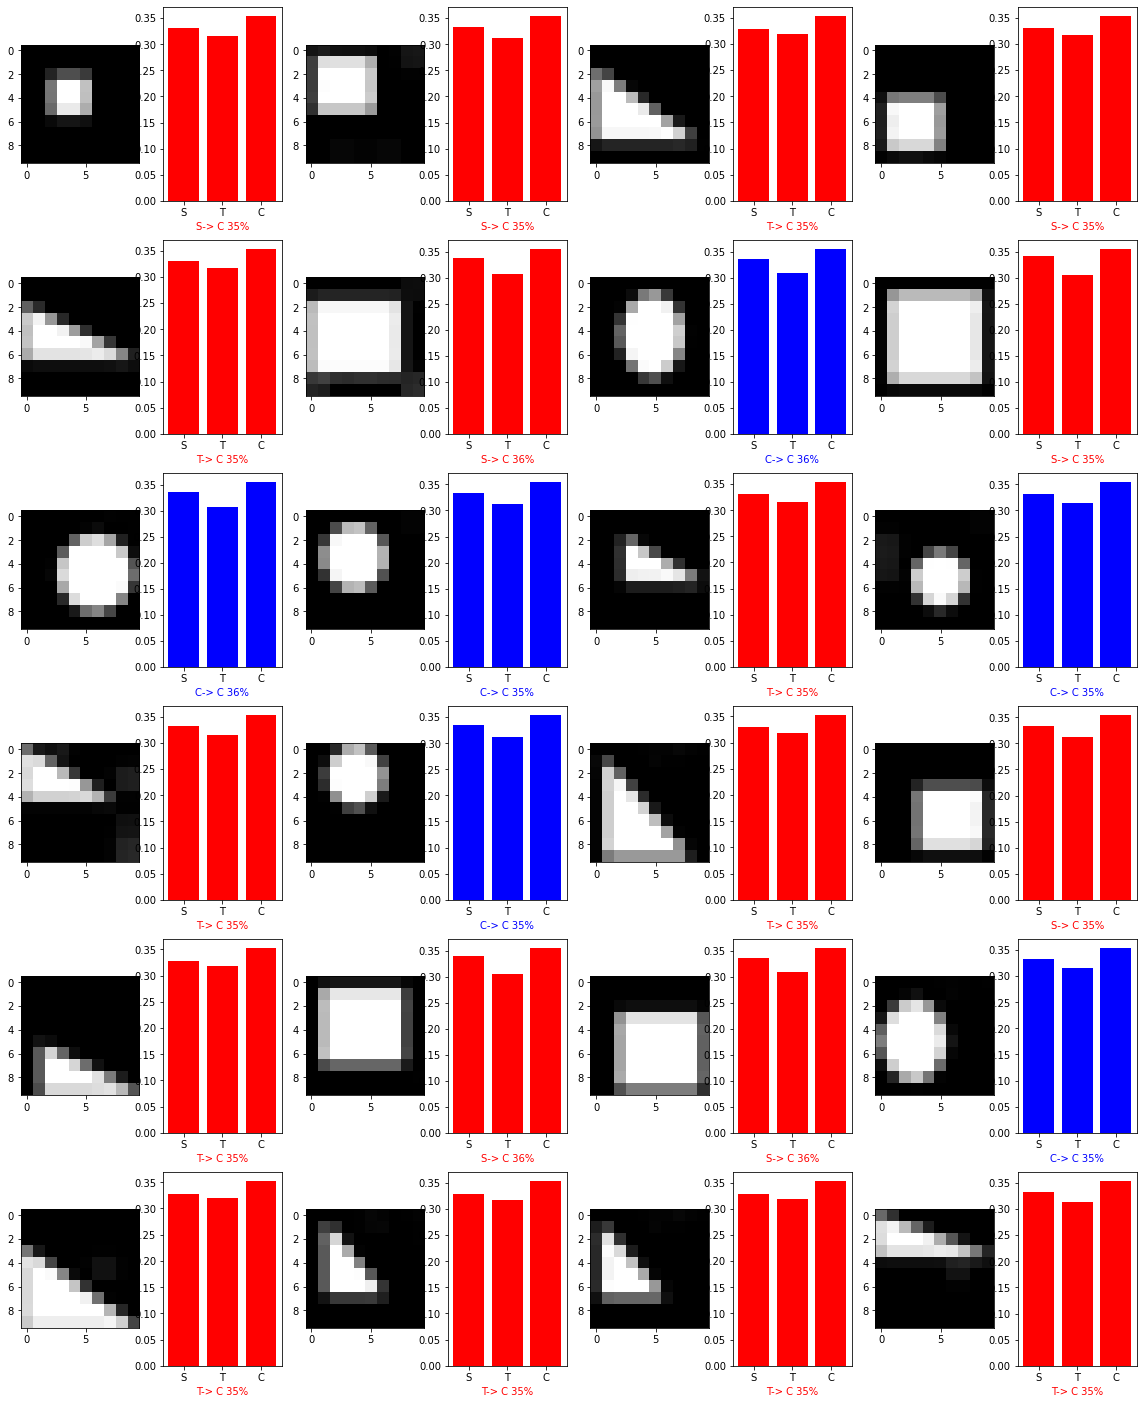

In [0]:
plt.figure(figsize=(20, 25))

for i in range(24) :        
  plt.subplot(6, 4*2, i*2+1)
  plt.imshow(x_test[i,:].reshape(im,im), cmap='gray')    
  c =  "blue" if  p[i] == y_data2[i]   else "red"    
  plt.subplot(6, 4*2, i*2+2)
  plt.bar(labels, h[i], color=c) #x축 레이블 y축 = 확률값, 칼라값
  #정답 레이블, 예측 레이블, 최대 확률값
  plt.xlabel("{}-> {} {:2.0f}%".format(labels[int(y_data2[  i ])], labels[p[  i ]],        100*np.max(h[i], axis=0)),  color = c )   
    #예측이 맞으면 파란색 틀리면 빨간색.